In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets

In [38]:
df = pd.read_csv('2013_movies-Copy1.csv')

In [39]:
df

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00
...,...,...,...,...,...,...,...
95,Rush,38000000.0,26947624,Ron Howard,R,123,2013-09-20 00:00:00
96,The Host,40000000.0,26627201,Andrew Niccol,PG-13,125,2013-03-29 00:00:00
97,The World's End,20000000.0,26004851,Edgar Wright,R,109,2013-08-23 00:00:00
98,21 and Over,13000000.0,25682380,Jon LucasScott Moore,R,93,2013-03-01 00:00:00


### Challenge 1

(array([734869., 734928., 734989., 735050., 735112., 735173., 735234.]),
 <a list of 7 Text major ticklabel objects>)

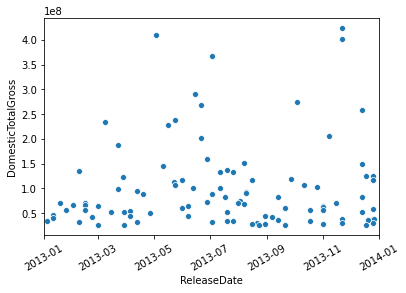

In [40]:
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])
df['ReleaseDate']
sns.scatterplot(data=df, x = 'ReleaseDate', y = 'DomesticTotalGross')
plt.xlim(734869,735234)
plt.xticks(rotation=30)

### Challenge 2

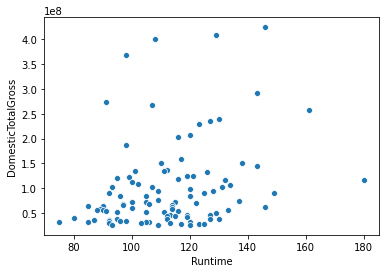

In [26]:
sns.scatterplot(data=df, x = 'Runtime', y = 'DomesticTotalGross')

### Challenge 3

In [27]:
grouped = df.groupby('Rating')[['DomesticTotalGross', 'Runtime']].mean()
grouped

,DomesticTotalGross,Runtime
Rating,,
G,2.684928e+08,107.000000
PG,1.311357e+08,99.933333
PG-13,1.114498e+08,117.510638
R,6.989243e+07,110.729730


### Challenge 4

In [28]:
Gmask = (df['Rating'] == 'G');
PGmask = (df['Rating'] == 'PG');
PG13mask = (df['Rating'] == 'PG-13');
Rmask = (df['Rating'] == 'R') 

Text(0.5, 1.0, 'R Movies')

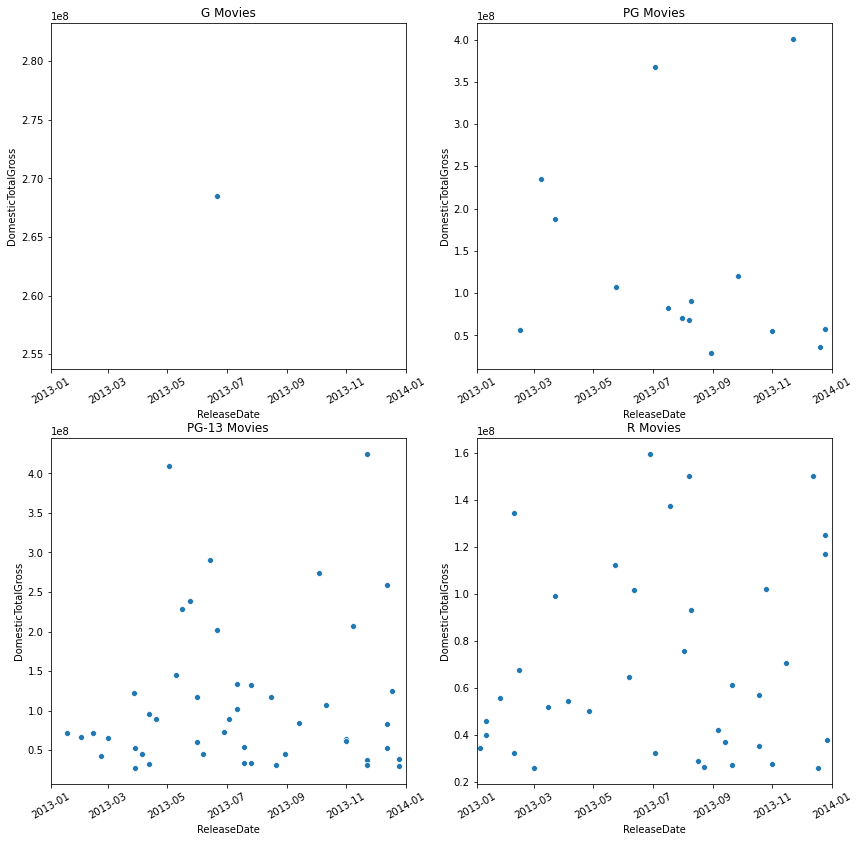

In [29]:
plt.figure(figsize=[14,14])

plt.subplot(2,2,1)
sns.scatterplot(data=df[Gmask], x = 'ReleaseDate', y = 'DomesticTotalGross')
plt.xlim(734869,735234)
plt.xticks(rotation=30)
plt.title('G Movies')

plt.subplot(2,2,2)
sns.scatterplot(data=df[PGmask], x = 'ReleaseDate', y = 'DomesticTotalGross')
plt.xlim(734869,735234)
plt.xticks(rotation=30)
plt.title('PG Movies')

plt.subplot(2,2,3)
sns.scatterplot(data=df[PG13mask], x = 'ReleaseDate', y = 'DomesticTotalGross')
plt.xlim(734869,735234)
plt.xticks(rotation=30)
plt.title('PG-13 Movies')

plt.subplot(2,2,4)
sns.scatterplot(data=df[Rmask], x = 'ReleaseDate', y = 'DomesticTotalGross')
plt.xlim(734869,735234)
plt.xticks(rotation=30)
plt.title('R Movies')

### Challenge 5  
Francis Lawrence

In [30]:
df.groupby('Director').DomesticTotalGross.mean().sort_values(ascending=False)

Director
Francis Lawrence             424668047
Shane Black                  409013994
Chris BuckJennifer Lee       400738009
Pierre CoffinChris Renaud    368061265
Zack Snyder                  291045518
                               ...    
Ron Howard                    26947624
Andrew Niccol                 26627201
Edgar Wright                  26004851
Jon LucasScott Moore          25682380
Spike Jonze                   25568251
Name: DomesticTotalGross, Length: 93, dtype: int64

### Challenge 6

In [44]:
df_sorted = df.sort_values(by= 'ReleaseDate')

In [45]:
def month_bin(date):
    if date.month == 1:
        return "January"
    elif date.month == 2:
        return "February"
    elif date.month == 3:
        return "March"
    elif date.month == 4:
        return "April"
    elif date.month == 5:
        return "May"
    elif date.month == 6:
        return "June"
    elif date.month == 7:
        return "July"
    elif date.month == 8:
        return "August"
    elif date.month == 9:
        return "September"
    elif date.month == 10:
        return "October"
    elif date.month == 11:
        return "November"
    elif date.month == 12:
        return "December"
    else:
        return 'NaN'

df_sorted['Month'] = df_sorted['ReleaseDate'].apply(month_bin)
df_sorted

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Month
83,Texas Chainsaw 3D,NaN,34341945,John Luessenhop,R,92,2013-01-04,January
76,A Haunted House,2500000.0,40041683,Michael Tiddes,R,80,2013-01-11,January
70,Gangster Squad,60000000.0,46000903,Ruben Fleischer,R,113,2013-01-11,January
46,Mama,15000000.0,71628180,Andres Muschietti,PG-13,100,2013-01-18,January
63,Hansel and Gretel: Witch Hunters,50000000.0,55703475,Tommy Wirkola,R,88,2013-01-25,January
...,...,...,...,...,...,...,...,...
59,The Secret Life of Walter Mitty,90000000.0,58236838,Ben Stiller,PG,114,2013-12-25,December
91,Grudge Match,40000000.0,29807260,Peter Segal,PG-13,113,2013-12-25,December
27,The Wolf of Wall Street,100000000.0,116900694,Martin Scorsese,R,180,2013-12-25,December
23,Lone Survivor,40000000.0,125095601,Peter Berg,R,121,2013-12-25,December


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

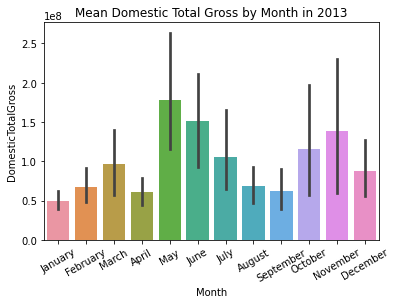

In [46]:
sns.barplot(data = df_sorted, x = 'Month', y = 'DomesticTotalGross')
plt.title('Mean Domestic Total Gross by Month in 2013')
plt.xticks(rotation=30)
